## _FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS_

### Part 1: Data Preparation and Exploration

#### Data Loading

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\DS_Assignments\Assignment_20-Time Series\Timeseries\exchange_rate.csv")

df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [5]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [6]:
print("Missing values in each column:\n", df.isna().sum())


Missing values in each column:
 date       0
Ex_rate    0
dtype: int64


#### Initial Exploration

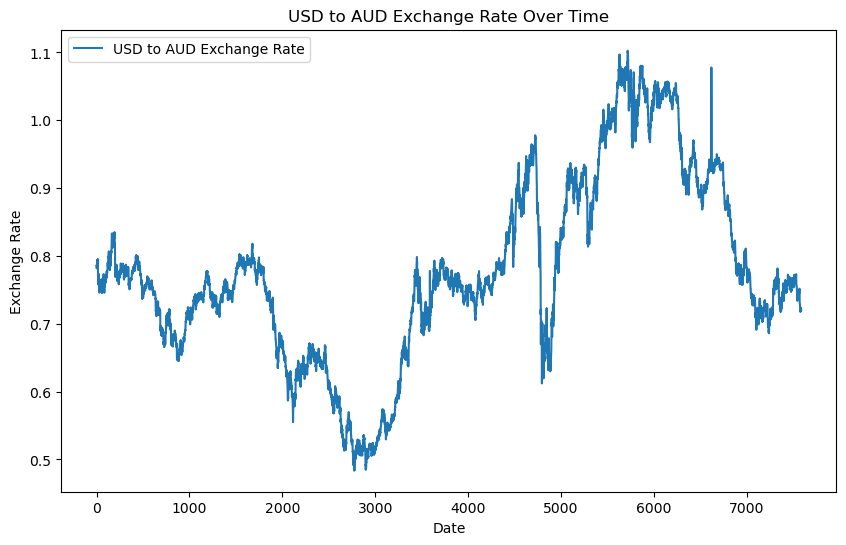

In [7]:
import matplotlib.pyplot as plt


# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Part 2: Model Building - ARIMA

#### Parameter Selection for ARIMA: 

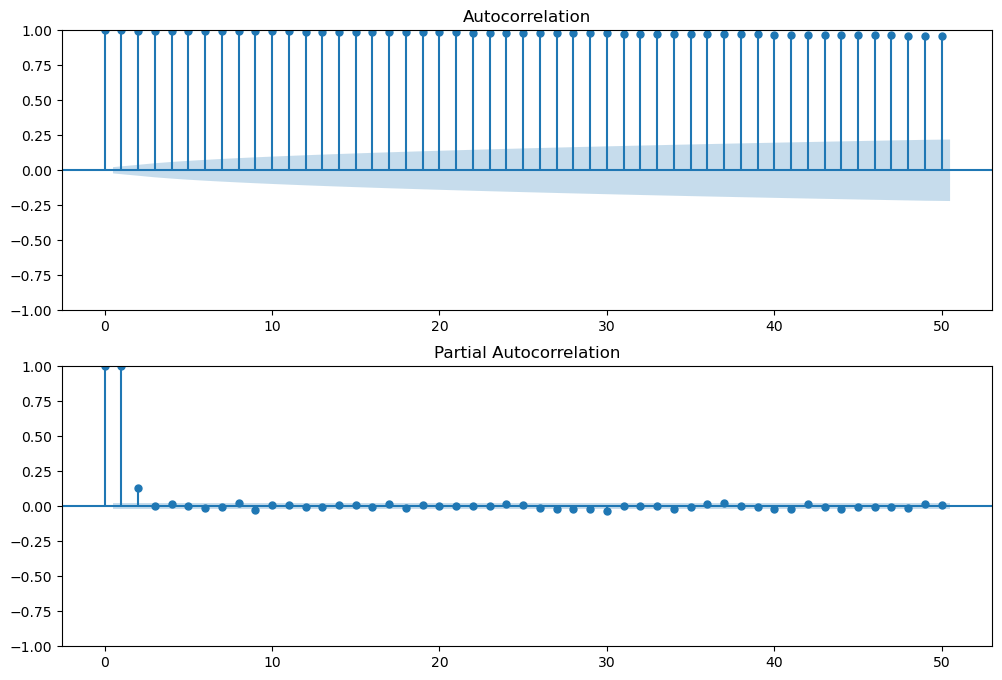

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to estimate p and q
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Ex_rate'], lags=50, ax=ax[0])
plot_pacf(df['Ex_rate'], lags=50, ax=ax[1])
plt.show()

#### Model Fitting: 

In [9]:
p = 1  # Example value from PACF plot
d = 1  # Example value for differencing to make series stationary
q = 1  # Example value from ACF plot

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = model.fit()

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 05 Jun 2024   AIC                         -56102.322
Time:                        12:21:57   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

#### Diagnostics:

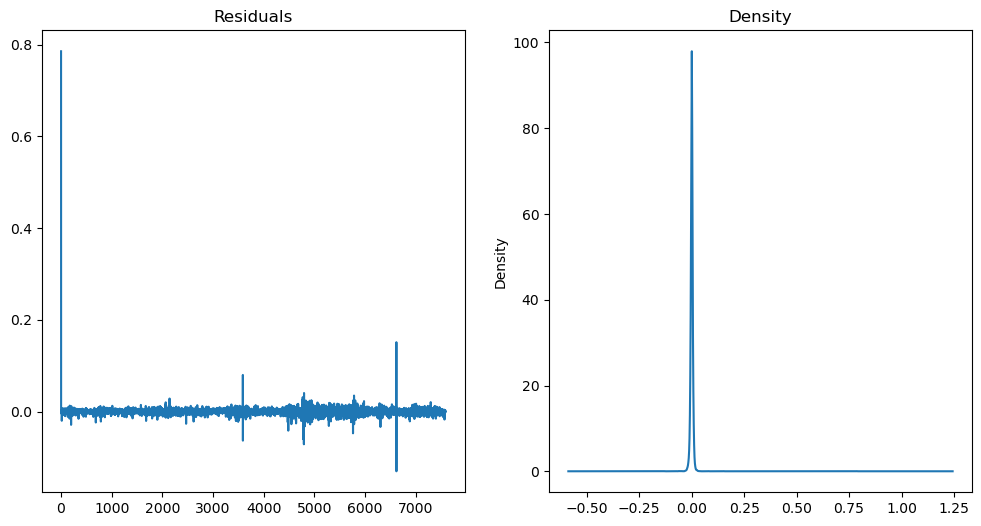

In [11]:
# Plot residuals
residuals = arima_result.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()



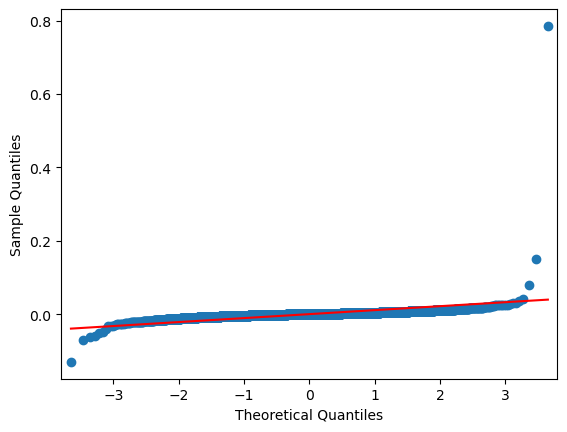

In [12]:
# QQ plot
import statsmodels.api as sm
fig = sm.qqplot(residuals, line='s')
plt.show()


#### Forecasting

C:\Users\Admin\AppData\Local\Temp\ipykernel_3848\1541929205.py:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')


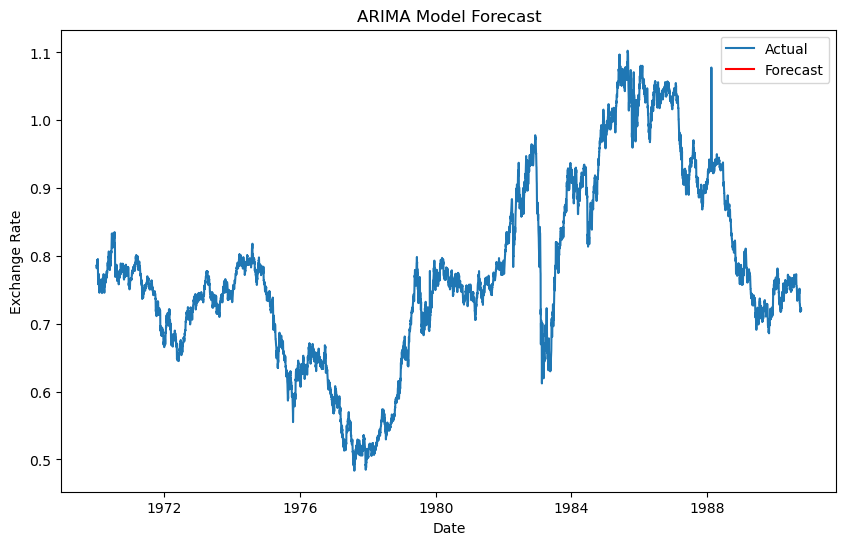

In [13]:
# Forecast
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


### Part 3: Model Building - Exponential Smoothing

#### 1.	Model Selection

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model (Holt-Winters)
hw_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()

print(hw_result.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Wed, 05 Jun 2024
Box-Cox:                          False   Time:                         12:22:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698373                alpha                 True
smoothing_seasonal       

#### Model Fitting and Forecasting

C:\Users\Admin\AppData\Local\Temp\ipykernel_3848\1118706234.py:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  hw_forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right')


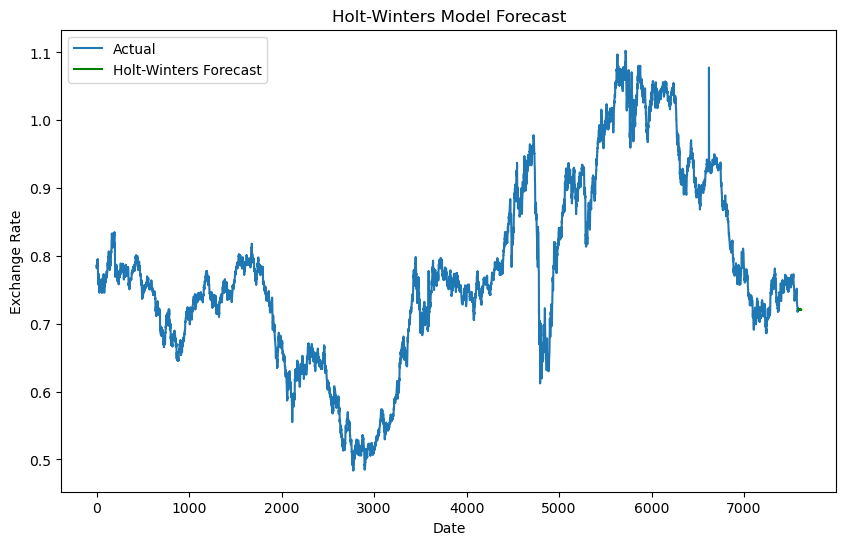

In [15]:
# Forecast
hw_forecast = hw_result.forecast(steps=forecast_steps)
hw_forecast = hw_result.forecast(steps=forecast_steps)
hw_forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right')
hw_forecast_series = pd.Series(hw_forecast.values, index=hw_forecast_index)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(hw_forecast, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


### Part 4: Evaluation and Comparison

#### Compute Error Metrics: 

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual = df['Ex_rate'][-forecast_steps:]

from sklearn.metrics import mean_absolute_error, mean_squared_error

# ARIMA errors
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast_series)
arima_rmse = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast_series, squared=False)

# Exponential Smoothing errors
hw_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], hw_forecast)
hw_rmse = mean_squared_error(df['Ex_rate'][-forecast_steps:], hw_forecast, squared=False)

print(f"ARIMA MAE: {arima_mae}, ARIMA RMSE: {arima_rmse}")
print(f"Holt-Winters MAE: {hw_mae}, Holt-Winters RMSE: {hw_rmse}")


ValueError: Input contains NaN.